# Library Import

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_boston

In [32]:
plt.rcParams['figure.figsize'] = [14, 9]
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 25

# assign 2

```
1번) trees.csv를 읽어들여서 아래에 대해 Volume을 예측해 보시오.(텐서, 케라스, 정규화후 처리)
Girth 8.8, 10.5
Height 63, 72

2. volume이 40 이상이면 크다, 30이상이면 보통 미만이면 적음으로 아래와 같이 출력하시오.
volume  정도
============
 10.3    적음
...

3. Height이 가장 작은값과 큰값을 구하시오.

4. girth(테두리) 가 가장큰 top5를 출력하세오.(girth, height, volume)
```

# 1번) trees.csv를 읽어들여서 아래에 대해 Volume을 예측해 보시오.(텐서, 케라스, 정규화후 처리)

In [3]:
df_trees = pd.read_csv('data/trees.csv')
df_trees

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


In [5]:
df_trees.shape

(31, 3)

In [4]:
df_trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Girth   31 non-null     float64
 1   Height  31 non-null     int64  
 2   Volume  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 872.0 bytes


## Tensor version

In [7]:
x_data = df_trees.iloc[:, :-1]
y_data = df_trees.iloc[:, [-1]]

In [9]:
x_data

,Girth,Height
0,8.3,70
1,8.6,65
2,8.8,63
3,10.5,72
4,10.7,81
5,10.8,83
6,11.0,66
7,11.0,75
8,11.1,80
9,11.2,75


In [10]:
y_data

,Volume
0,10.3
1,10.3
2,10.2
3,16.4
4,18.8
5,19.7
6,15.6
7,18.2
8,22.6
9,19.9


### Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#### Feature

In [15]:
scaleF = MinMaxScaler()                 
x_dataN = scaleF.fit_transform( x_data)  

In [16]:
x_dataN

array([[0.        , 0.29166667],
       [0.02439024, 0.08333333],
       [0.04065041, 0.        ],
       [0.17886179, 0.375     ],
       [0.19512195, 0.75      ],
       [0.20325203, 0.83333333],
       [0.2195122 , 0.125     ],
       [0.2195122 , 0.5       ],
       [0.22764228, 0.70833333],
       [0.23577236, 0.5       ],
       [0.24390244, 0.66666667],
       [0.25203252, 0.54166667],
       [0.25203252, 0.54166667],
       [0.27642276, 0.25      ],
       [0.30081301, 0.5       ],
       [0.37398374, 0.45833333],
       [0.37398374, 0.91666667],
       [0.40650407, 0.95833333],
       [0.43902439, 0.33333333],
       [0.44715447, 0.04166667],
       [0.46341463, 0.625     ],
       [0.4796748 , 0.70833333],
       [0.50406504, 0.45833333],
       [0.62601626, 0.375     ],
       [0.6504065 , 0.58333333],
       [0.73170732, 0.75      ],
       [0.74796748, 0.79166667],
       [0.7804878 , 0.70833333],
       [0.78861789, 0.70833333],
       [0.78861789, 0.70833333],
       [1.

#### Label

In [17]:
scaleL = MinMaxScaler()                
y_dataN = scaleL.fit_transform( y_data) 

In [18]:
y_dataN

array([[0.00149701],
       [0.00149701],
       [0.        ],
       [0.09281437],
       [0.12874251],
       [0.14221557],
       [0.08083832],
       [0.11976048],
       [0.18562874],
       [0.14520958],
       [0.20958084],
       [0.16167665],
       [0.16766467],
       [0.16616766],
       [0.13323353],
       [0.17964072],
       [0.35329341],
       [0.25748503],
       [0.23203593],
       [0.22005988],
       [0.36377246],
       [0.32185629],
       [0.39071856],
       [0.42065868],
       [0.48502994],
       [0.67664671],
       [0.68113772],
       [0.72005988],
       [0.61826347],
       [0.61077844],
       [1.        ]])

### Tensor Node 생성

In [25]:
from tensorflow.keras.optimizers import Adam

In [21]:
x = tf.constant( x_dataN, tf.float32 )
y = tf.constant( y_dataN, tf.float32 )

In [22]:
w = tf.Variable( tf.random.uniform( [2,1] ) )
b = tf.Variable( tf.random.uniform( [1] ) )

### cost func.

In [23]:
def compute_loss():
    hx = tf.matmul(x, w) + b
    cost = tf.reduce_mean( (hx-y)**2 )
    return cost

### early stopping

In [75]:
patience = 100     
min_delta = 0.01   
hist_cost = []      
pcnt = 0           


optimizer = Adam(0.1)
for i in range( 10000):
    optimizer.minimize( compute_loss, var_list=[w,b] )
    c = compute_loss().numpy()
    hist_cost.append( c )
    print(i, "cost:", c)
    
    if i>0:  
        if hist_cost[i-1] - hist_cost[i] > min_delta:
            pcnt = 0                                   
                                                       
        else:
            pcnt += 1                                  
                                   

        if pcnt >= patience:                   
            print( 'early stop' )
            break

0 cost: 0.03978611
1 cost: 0.004924062
2 cost: 0.012396507
3 cost: 0.025047837
4 cost: 0.01827159
5 cost: 0.006629314
6 cost: 0.003270892
7 cost: 0.00877619
8 cost: 0.013858893
9 cost: 0.012435033
10 cost: 0.0070476863
11 cost: 0.0033004936
12 cost: 0.0040292447
13 cost: 0.007266431
14 cost: 0.0089669805
15 cost: 0.0074909003
16 cost: 0.004612397
17 cost: 0.003069218
18 cost: 0.0038778456
19 cost: 0.005642147
20 cost: 0.0062832646
21 cost: 0.005219296
22 cost: 0.0036464368
23 cost: 0.0030565073
24 cost: 0.0037447237
25 cost: 0.0046905302
26 cost: 0.004789028
27 cost: 0.0039955783
28 cost: 0.0031904299
29 cost: 0.003128661
30 cost: 0.0036790376
31 cost: 0.004091085
32 cost: 0.0038900694
33 cost: 0.0033429363
34 cost: 0.0030511385
35 cost: 0.0032454818
36 cost: 0.0035872855
37 cost: 0.00363159
38 cost: 0.0033448492
39 cost: 0.0030776123
40 cost: 0.0031039852
41 cost: 0.0033169803
42 cost: 0.003411303
43 cost: 0.0032739267
44 cost: 0.0030878396
45 cost: 0.0030661975
46 cost: 0.0031901246


In [76]:
w.numpy()

array([[0.8665727 ],
       [0.12153711]], dtype=float32)

In [77]:
b.numpy()

array([-0.11617534], dtype=float32)

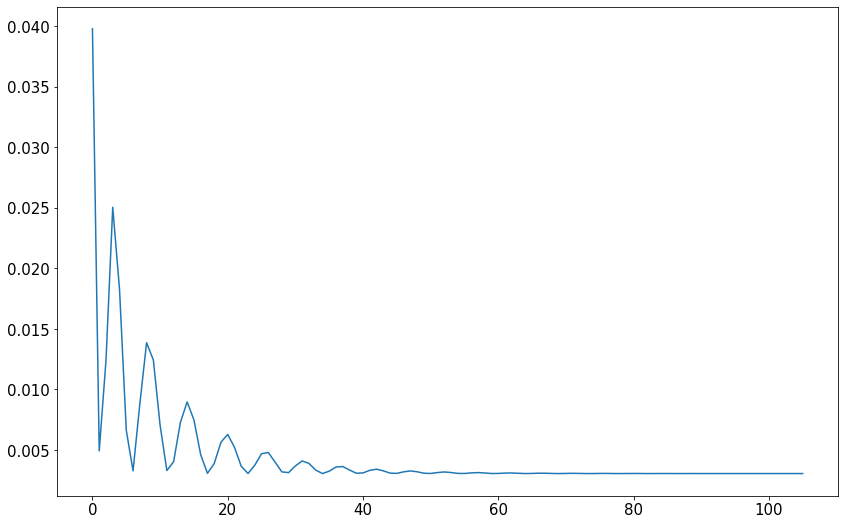

In [78]:
plt.plot(hist_cost)
plt.show()

### Prediction

In [79]:
def hxfn( xdata):
    xd = tf.constant( xdata, tf.float32)
    hx = tf.matmul(xd, w) + b
    return hx.numpy()

#### Test data sacling(transform)

In [80]:
xn = scaleF.transform( [[8.8, 63], [10.5, 72]] )
xn

array([[0.04065041, 0.        ],
       [0.17886179, 0.375     ]])

#### Prediction result

In [81]:
result = hxfn(xn)
result

array([[-0.08094881],
       [ 0.08439781]], dtype=float32)

In [82]:
scaleL.inverse_transform(result)

array([[ 4.7926197],
       [15.837773 ]], dtype=float32)

### 스케일링 이전 시각화

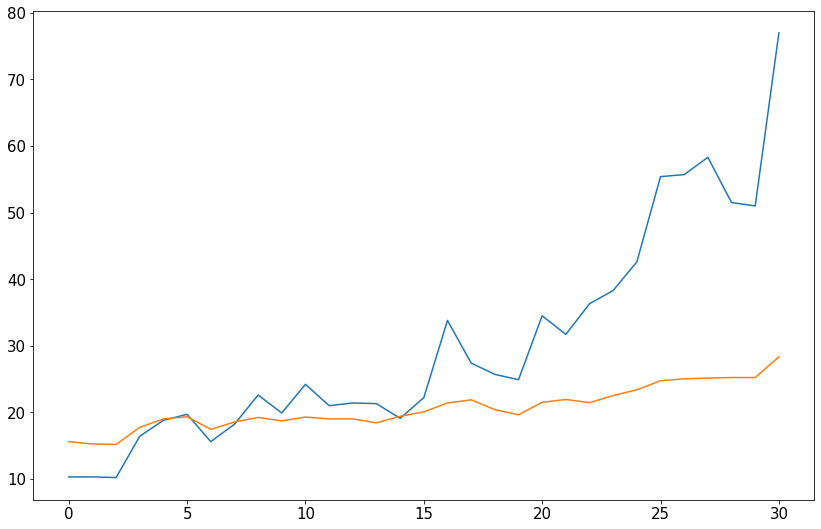

In [116]:
plt.plot(y_data)
plt.plot(hxfn(x_data))
plt.show()

### 스케일링 후 시각화

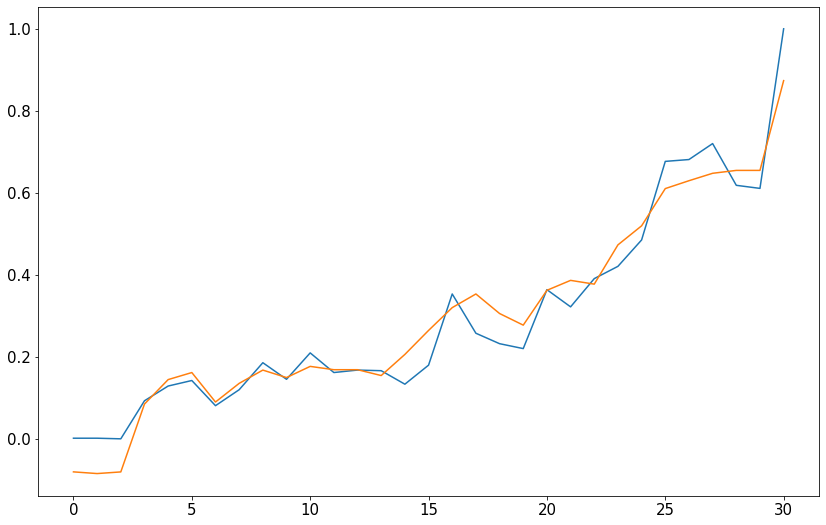

In [117]:
plt.plot(y_dataN)
plt.plot(hxfn(x_dataN))
plt.show()

2

## Keras version

In [84]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### dense 객체 생성
### early stopping

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

In [88]:
dense = Dense( units=1, input_dim= x_data.shape[1] )               # xavier 알고리즘 // he 알고리즘 ==> w,b의 초기화방법이 다름
model = Sequential( [dense] )
model.compile( loss='mse', optimizer=Adam(0.1) )

earlyStop = EarlyStopping(monitor='loss', min_delta=0.01, patience=100)  # loss를 monitor하겠다.
h = model.fit( x_dataN, y_dataN, epochs=10000, callbacks=[earlyStop])

Epoch 1/10000
1/1 [==============================] - 0s 144ms/step - loss: 0.3058
Epoch 2/10000
1/1 [==============================] - 0s 998us/step - loss: 0.1360
Epoch 3/10000
1/1 [==============================] - 0s 997us/step - loss: 0.0477
Epoch 4/10000
1/1 [==============================] - 0s 997us/step - loss: 0.0308
Epoch 5/10000
1/1 [==============================] - 0s 998us/step - loss: 0.0574
Epoch 6/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0894
Epoch 7/10000
1/1 [==============================] - 0s 998us/step - loss: 0.1022
Epoch 8/10000
1/1 [==============================] - 0s 996us/step - loss: 0.0928
Epoch 9/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0703
Epoch 10/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0454
Epoch 11/10000
1/1 [==============================] - 0s 997us/step - loss: 0.0269
Epoch 12/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 13/10000
1/1 [=

Epoch 101/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 102/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 103/10000
1/1 [==============================] - 0s 997us/step - loss: 0.0031
Epoch 104/10000
1/1 [==============================] - 0s 998us/step - loss: 0.0031
Epoch 105/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 106/10000
1/1 [==============================] - 0s 993us/step - loss: 0.0031
Epoch 107/10000
1/1 [==============================] - 0s 997us/step - loss: 0.0031
Epoch 108/10000
1/1 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 109/10000
1/1 [==============================] - 0s 996us/step - loss: 0.0031
Epoch 110/10000
1/1 [==============================] - 0s 997us/step - loss: 0.0031
Epoch 111/10000
1/1 [==============================] - 0s 997us/step - loss: 0.0031
Epoch 112/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0031
Ep

### Loss 시각화로 확인

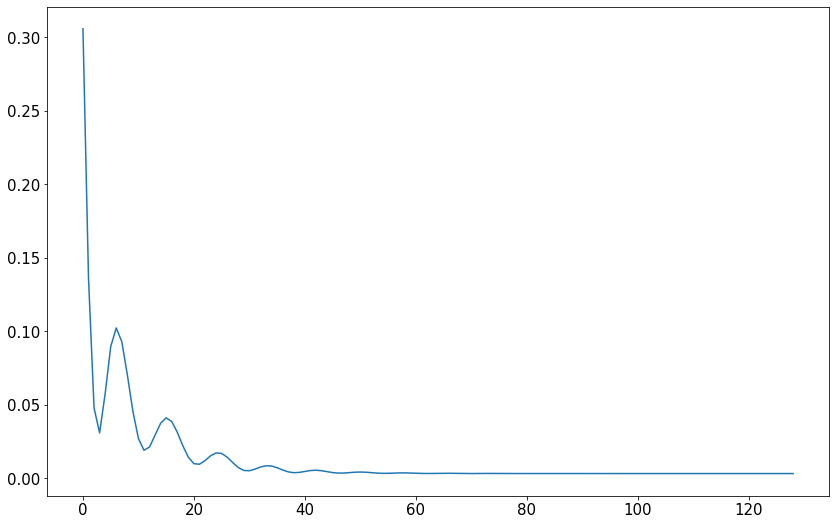

In [89]:
plt.plot(h.history['loss'])
plt.show()

### 매개변수 확인

In [90]:
w, b = model.get_weights()
w

array([[0.86819226],
       [0.12141621]], dtype=float32)

### Prediction

#### Test data sacling(transform)

In [91]:
xn = scaleF.transform( [[8.8, 63], [10.5, 72]] )
xn

array([[0.04065041, 0.        ],
       [0.17886179, 0.375     ]])

#### Prediction result

In [94]:
result = model.predict(xn)
result

array([[-0.08072285],
       [ 0.08480227]], dtype=float32)

In [95]:
scaleL.inverse_transform(result)

array([[ 4.8077135],
       [15.864792 ]], dtype=float32)

### 스케일링 이전 시각화

In [109]:
result = model.predict(x_dataN)
result

array([[-0.08060217],
       [-0.08472179],
       [-0.08072285],
       [ 0.08480227],
       [ 0.14445028],
       [ 0.16162679],
       [ 0.08974059],
       [ 0.13527167],
       [ 0.16762519],
       [ 0.14938861],
       [ 0.17668313],
       [ 0.16856456],
       [ 0.16856456],
       [ 0.15432695],
       [ 0.20585641],
       [ 0.26432365],
       [ 0.31997275],
       [ 0.35326567],
       [ 0.3056144 ],
       [ 0.27725983],
       [ 0.3622029 ],
       [ 0.38643786],
       [ 0.37725922],
       [ 0.47301832],
       [ 0.5194888 ],
       [ 0.6103096 ],
       [ 0.6294855 ],
       [ 0.64760137],
       [ 0.65465987],
       [ 0.65465987],
       [ 0.8735932 ]], dtype=float32)

In [110]:
r = scaleL.inverse_transform( result)
r

array([[ 4.8157754],
       [ 4.5405846],
       [ 4.8077135],
       [15.864792 ],
       [19.84928  ],
       [20.99667  ],
       [16.194672 ],
       [19.236147 ],
       [21.397364 ],
       [20.17916  ],
       [22.002434 ],
       [21.460114 ],
       [21.460114 ],
       [20.50904  ],
       [23.951208 ],
       [27.85682  ],
       [31.57418  ],
       [33.798145 ],
       [30.615044 ],
       [28.720957 ],
       [34.395153 ],
       [36.01405  ],
       [35.400917 ],
       [41.797623 ],
       [44.90185  ],
       [50.96868  ],
       [52.24963  ],
       [53.45977  ],
       [53.93128  ],
       [53.93128  ],
       [68.55602  ]], dtype=float32)

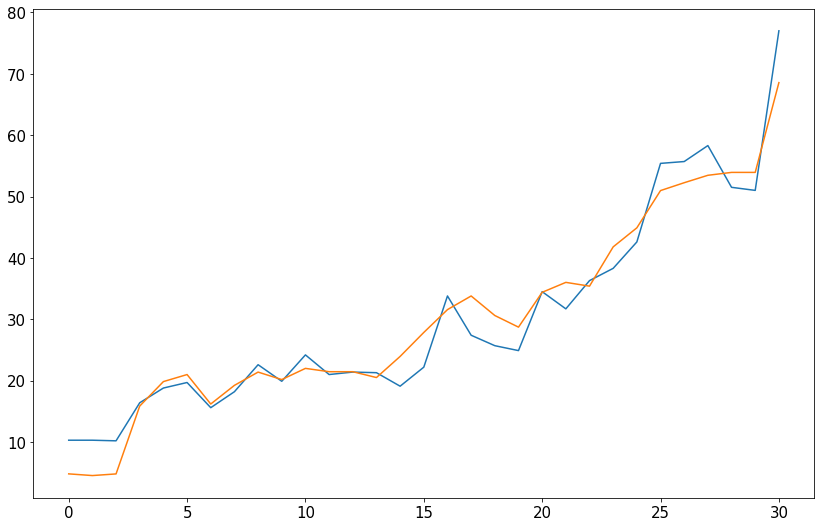

In [112]:
plt.plot(y_data)
plt.plot( r )
plt.show()

### 스케일링 후 시각화

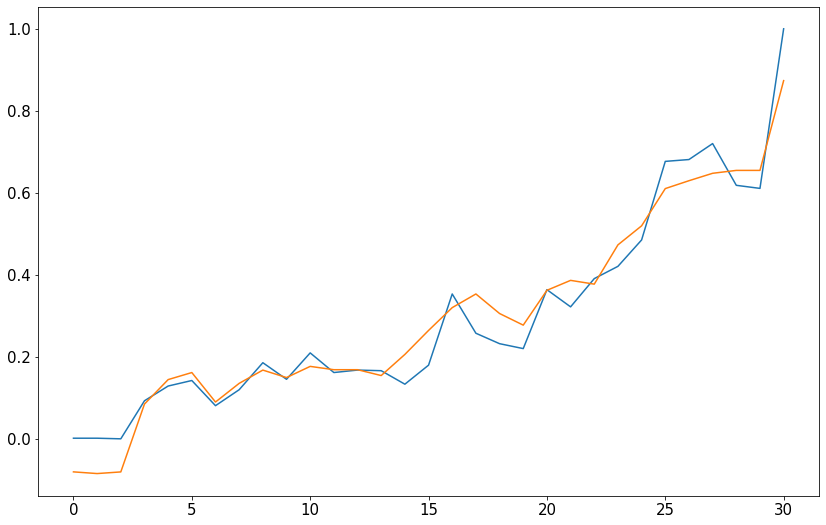

In [118]:
plt.plot(y_dataN)
plt.plot( model.predict(x_dataN) )
plt.show()

# 2번)

```
volume이 40 이상이면 크다, 30이상이면 보통 미만이면 적음으로 아래와 같이 출력하시오.
volume  정도
============
 10.3    적음
...
```

In [158]:
def disc(x):
    if x >=40:
        return "크다"
    elif x>=30:
        return "보통"
    else:
        return "적음"

In [159]:
df_trees['Volume'].apply(lambda x: disc(x))

0     적음
1     적음
2     적음
3     적음
4     적음
5     적음
6     적음
7     적음
8     적음
9     적음
10    적음
11    적음
12    적음
13    적음
14    적음
15    적음
16    보통
17    적음
18    적음
19    적음
20    보통
21    보통
22    보통
23    보통
24    크다
25    크다
26    크다
27    크다
28    크다
29    크다
30    크다
Name: Volume, dtype: object

In [160]:
df_trees['정도'] = df_trees['Volume'].apply(lambda x: disc(x))
df_trees

,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음
3,10.5,72,16.4,적음
4,10.7,81,18.8,적음
5,10.8,83,19.7,적음
6,11.0,66,15.6,적음
7,11.0,75,18.2,적음
8,11.1,80,22.6,적음
9,11.2,75,19.9,적음


In [171]:
df_trees.iloc[:,2:4]

,Volume,정도
0,10.3,적음
1,10.3,적음
2,10.2,적음
3,16.4,적음
4,18.8,적음
5,19.7,적음
6,15.6,적음
7,18.2,적음
8,22.6,적음
9,19.9,적음


# 3번) Height이 가장 작은값과 큰값을 구하시오.

## 가장 작은 값

In [146]:
df_trees.nsmallest(1,'Height', keep="all")['Height']

2    63
Name: Height, dtype: int64

## 가장 큰 값

In [144]:
df_trees.nlargest(1,'Height', keep="all")['Height']

30    87
Name: Height, dtype: int64

# 4번) girth(테두리) 가 가장큰 top5를 출력하세오.(girth, height, volume)

In [149]:
df_trees.nlargest(5, 'Girth', keep="all")

,Girth,Height,Volume
30,20.6,87,77.0
28,18.0,80,51.5
29,18.0,80,51.0
27,17.9,80,58.3
26,17.5,82,55.7
